   # A/A/B Test result analysis. 

# Table of contents  
1.[Introduction](#intro)  
2.[Steps](#steps)  
3.[Data Preprocessing](#data_prep)    
4.[Study the event funnel](#step1)   
5.[Study the A/A/B test results. ](#step2)  
6.[Conclusion](#end)  


<div id='intro'/>

## Introduction:  

Investigate the user behavior for a company's app ,that sells food products.   
The designers would like to change the fonts for the entire app, but the managers are afraid the users  
might find the new design intimidating. They decide to make a decision based on the results of an A/A/B test.

<div id='steps'/>

## Steps:  

Analysis in done in 2 main steps.  
1.Study the sales funnel.  
2.Study the A/A/B test results.  

In [147]:
#importing all the packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mth
from plotly import graph_objects as go
import warnings

In [148]:
warnings.filterwarnings("ignore")
#Download the dataset
logs_df=pd.read_csv('/datasets/logs_exp_us.csv', delimiter='\t')
logs_df.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


***Missing values***

In [149]:
#Dataset details
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


***We don't see any missing values in the dataset.***

<div id='data_prep'/>

## Data Preprocessing.  

In [150]:
#renaming all column names to lower case with _
logs_df=logs_df.rename(columns={'EventName':'event_name',
                                'DeviceIDHash':'device_id_hash',
                                'EventTimestamp':'event_timestamp',
                                 'ExpId':'exp_id'})
logs_df.head(10)


,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


In [151]:
logs_df['event_name'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64

We see 5 events that are repeated throughout the dataset..So,will convert data type to category.

In [152]:
logs_df['event_name']=logs_df['event_name'].astype('category')

In [153]:
logs_df['device_id_hash'].value_counts().head(10)

6304868067479728361    2308
197027893265565660     2003
4623191541214045580    1771
6932517045703054087    1448
1754140665440434215    1222
3337471580007169353    1186
7738058666231999878     893
1055544042902443290     854
4713748699910253089     824
8118046800480174342     756
Name: device_id_hash, dtype: int64

In [154]:
logs_df['event_timestamp'].value_counts().head(10)

1564670435    9
1564935799    9
1564911846    8
1565176721    8
1565191469    8
1565017227    8
1565084628    7
1565098080    7
1565031980    7
1564753019    7
Name: event_timestamp, dtype: int64

In [155]:
#creating new columns for datetime and date.
logs_df['event_datetime'] = pd.to_datetime(logs_df['event_timestamp'], 
                                  unit='s')
logs_df['event_date']=logs_df['event_datetime'].dt.date

In [156]:
logs_df['exp_id'].value_counts()

248    85747
246    80304
247    78075
Name: exp_id, dtype: int64

In [157]:
#exp_id changed to category type.  
logs_df['exp_id']=logs_df['exp_id'].astype('category')

In [158]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  category      
 1   device_id_hash   244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   exp_id           244126 non-null  category      
 4   event_datetime   244126 non-null  datetime64[ns]
 5   event_date       244126 non-null  object        
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 7.9+ MB


In [159]:
logs_df.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
5,CartScreenAppear,6217807653094995999,1564055323,248,2019-07-25 11:48:43,2019-07-25
6,OffersScreenAppear,8351860793733343758,1564066242,246,2019-07-25 14:50:42,2019-07-25
7,MainScreenAppear,5682100281902512875,1564085677,246,2019-07-25 20:14:37,2019-07-25
8,MainScreenAppear,1850981295691852772,1564086702,247,2019-07-25 20:31:42,2019-07-25
9,MainScreenAppear,5407636962369102641,1564112112,246,2019-07-26 03:35:12,2019-07-26


In [160]:
logs_df['event_datetime'].value_counts().head(10)

2019-08-04 16:23:19    9
2019-08-01 14:40:35    9
2019-08-05 15:00:27    8
2019-08-07 11:18:41    8
2019-08-04 09:44:06    8
2019-08-07 15:24:29    8
2019-08-05 12:47:50    7
2019-08-07 14:27:57    7
2019-08-05 19:06:20    7
2019-08-01 13:06:35    7
Name: event_datetime, dtype: int64

In [161]:
logs_df['event_date'].value_counts()

2019-08-01    36229
2019-08-05    36113
2019-08-06    35822
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-07    31144
2019-07-31     2031
2019-07-30      413
2019-07-29      184
2019-07-28      105
2019-07-27       55
2019-07-26       31
2019-07-25        9
Name: event_date, dtype: int64

# Data Analysis

In [162]:
n_users=logs_df['device_id_hash'].nunique()
n_users

7551

In [163]:
total_events=logs_df['event_name'].count()
total_events

244126

In [164]:
total_unique_events=logs_df['event_name'].nunique()
total_unique_events

5

In [165]:
n_events_per_user=round(total_events/n_users)
n_events_per_user

32

***1.There are 7551 unique users in total in the dataset.  
2.We see that they are 5 events - MainScreen,OffersScreen,CartScreen , Payment Screen and Tutorials page .These events are repeated around 244126 times..  
3.Number of events performed by each user is calculated to be around 32.***

In [166]:
#group by user
logs_df_user=logs_df.groupby(['device_id_hash','event_datetime']).agg({'event_name':'count'}).reset_index()
logs_df_user.head(10)

,device_id_hash,event_datetime,event_name
0,6888746892508752,2019-08-06 14:06:34,1
1,6909561520679493,2019-08-06 18:52:54,1
2,6909561520679493,2019-08-06 18:52:58,3
3,6909561520679493,2019-08-06 18:53:04,1
4,6922444491712477,2019-08-04 14:19:33,1
5,6922444491712477,2019-08-04 14:19:40,3
6,6922444491712477,2019-08-04 14:19:46,1
7,6922444491712477,2019-08-04 17:16:28,1
8,6922444491712477,2019-08-04 17:16:32,1
9,6922444491712477,2019-08-04 17:16:33,2


In [167]:
#average number of events per user
events_per_user=logs_df.groupby(['device_id_hash','event_date']).agg({'event_name':'count'}).reset_index()
events_per_user.head(10)


,device_id_hash,event_date,event_name
0,6888746892508752,2019-08-06,1
1,6909561520679493,2019-08-06,5
2,6922444491712477,2019-08-04,10
3,6922444491712477,2019-08-05,23
4,6922444491712477,2019-08-06,14
5,7435777799948366,2019-08-05,5
6,7435777799948366,2019-08-07,1
7,7702139951469979,2019-08-01,31
8,7702139951469979,2019-08-02,18
9,7702139951469979,2019-08-03,17


In [168]:
events_per_date=logs_df.groupby(['event_date','event_datetime']).agg({'event_name':'count'}).reset_index()
events_per_date.tail(10)

,event_date,event_datetime,event_name
176644,2019-08-07,2019-08-07 21:10:10,1
176645,2019-08-07,2019-08-07 21:10:13,1
176646,2019-08-07,2019-08-07 21:10:24,1
176647,2019-08-07,2019-08-07 21:11:55,1
176648,2019-08-07,2019-08-07 21:12:11,1
176649,2019-08-07,2019-08-07 21:12:25,1
176650,2019-08-07,2019-08-07 21:13:59,1
176651,2019-08-07,2019-08-07 21:14:43,1
176652,2019-08-07,2019-08-07 21:14:58,1
176653,2019-08-07,2019-08-07 21:15:17,1


In [169]:
events_per_date['event_date'].describe()

count         176654
unique            14
top       2019-08-02
freq           26216
Name: event_date, dtype: object

In [170]:
events_per_date['event_date'].max()

datetime.date(2019, 8, 7)

In [171]:
events_per_date['event_date'].min()

datetime.date(2019, 7, 25)

'logs_df' dataset has records of events from 2019-07-25 to 2019-08-07.

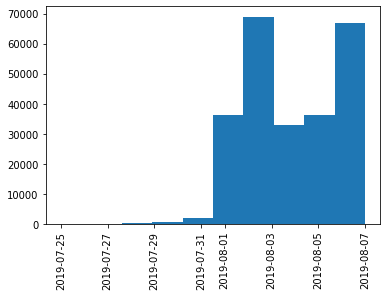

In [172]:
plt.hist(logs_df['event_date'])
plt.xticks(rotation=90)
plt.show()

We see effective use of the app only by 31st of July 2019 ...We literally don't see any values prior to it from   
the dates 25-30 of July 2019.

In [173]:
#Verifying with percentile
np.percentile(logs_df['event_datetime'],[1,5,10,50,95])

array(['2019-07-31T22:02:36.000000000', '2019-08-01T09:28:20.250000000',
       '2019-08-01T14:37:06.500000000', '2019-08-04T11:49:55.000000000',
       '2019-08-07T14:36:21.750000000'], dtype='datetime64[ns]')

Numpy percentile calculation shows that the data from '2019-07-25' to  '2019-07-31' doesn't even contribute  
to 1% of the data ..So, will ignore datas till 2019-07-31..

In [174]:
#create new dataset without records from 25-30 of July 2019
logs_updated_df=logs_df[logs_df['event_date']>pd.to_datetime('2019-07-31')]

In [175]:
logs_updated_df.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01
2834,OffersScreenAppear,3737462046622621720,1564618226,246,2019-08-01 00:10:26,2019-08-01
2835,MainScreenAppear,3737462046622621720,1564618247,246,2019-08-01 00:10:47,2019-08-01
2836,MainScreenAppear,3737462046622621720,1564618270,246,2019-08-01 00:11:10,2019-08-01
2837,MainScreenAppear,3737462046622621720,1564618280,246,2019-08-01 00:11:20,2019-08-01


In [176]:
#checking for duplicates
logs_duplicates=logs_updated_df[logs_updated_df.duplicated(keep=False)].sort_values(by='event_datetime')
logs_duplicates.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
3572,MainScreenAppear,434103746454591587,1564628377,248,2019-08-01 02:59:37,2019-08-01
3573,MainScreenAppear,434103746454591587,1564628377,248,2019-08-01 02:59:37,2019-08-01
4075,MainScreenAppear,3761373764179762633,1564631266,247,2019-08-01 03:47:46,2019-08-01
4076,MainScreenAppear,3761373764179762633,1564631266,247,2019-08-01 03:47:46,2019-08-01
4801,MainScreenAppear,2835328739789306622,1564634641,248,2019-08-01 04:44:01,2019-08-01
4803,MainScreenAppear,2835328739789306622,1564634641,248,2019-08-01 04:44:01,2019-08-01
5639,CartScreenAppear,4248762472840564256,1564637764,248,2019-08-01 05:36:04,2019-08-01
5641,CartScreenAppear,4248762472840564256,1564637764,248,2019-08-01 05:36:04,2019-08-01
5874,PaymentScreenSuccessful,6427012997733591237,1564638452,248,2019-08-01 05:47:32,2019-08-01
5875,PaymentScreenSuccessful,6427012997733591237,1564638452,248,2019-08-01 05:47:32,2019-08-01


In [177]:
logs_duplicates[(logs_duplicates['event_name']=='CartScreenAppear') & (logs_duplicates['device_id_hash']==2382591782303281935)]

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
242358,CartScreenAppear,2382591782303281935,1565206049,246,2019-08-07 19:27:29,2019-08-07
242362,CartScreenAppear,2382591782303281935,1565206049,246,2019-08-07 19:27:29,2019-08-07


***Analysing the duplicates ,most of the cases the event appears twice..Since , we have only less percentage of duplicates  (around 700 in a total of more than 200000 records , we will keep the first record and drop other duplicates .***  


In [178]:
logs_updated_df=logs_updated_df.drop_duplicates()

In [179]:
logs_updated_df['exp_id'].value_counts()

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

Since this dataset is to be used for A/A test , we need to make sure data from all 3 groups are  
evenly distributed with not more than 1% difference.  
Will take equal number of users from each experiment(user group).

In [180]:
#number of users in exp_id 246
n_246=logs_updated_df[logs_updated_df['exp_id']==246]['device_id_hash'].nunique()
n_246

2484

In [181]:
#number of users in exp_id 247
n_247=logs_updated_df[logs_updated_df['exp_id']==247]['device_id_hash'].nunique()
n_247

2513

In [182]:
#number of users in exp_id 248
n_248=logs_updated_df[logs_updated_df['exp_id']==248]['device_id_hash'].nunique()
n_248

2537

In [183]:
logs_updated_df.duplicated().sum()

0

In [184]:
#Create a dataset with equal number of users in each exp_id (2484)
logs_updated_df2=logs_updated_df[logs_updated_df['exp_id']==247]
logs_updated_df2.head(5)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01
2838,MainScreenAppear,4899590676214355127,1564618288,247,2019-08-01 00:11:28,2019-08-01
2839,OffersScreenAppear,4899590676214355127,1564618290,247,2019-08-01 00:11:30,2019-08-01
2843,OffersScreenAppear,4899590676214355127,1564618356,247,2019-08-01 00:12:36,2019-08-01


In [185]:
logs_updated_df2['device_id_hash'].nunique()

2513

In [186]:
#take a sample of 2484 users with exp_id=247
logs_updated_df3=logs_updated_df2.groupby('device_id_hash').nunique().reset_index()
logs_updated_df3=logs_updated_df3['device_id_hash'].sample(2484)
logs_temp=pd.DataFrame(logs_updated_df3)
logs_temp.head(10)

,device_id_hash
617,2285920690243309957
2040,7559713240699306882
570,2095513126738999163
2028,7533406193277938189
2323,8551304834996164071
2148,7939747556084232140
79,396921694825627632
2338,8604753852490386123
1395,5141538748160044717
2461,9011160146324462744


In [187]:
#dataset contains 2484 users with exp_id=247
logs_updated_df2=logs_updated_df2.merge(logs_temp,on='device_id_hash')
logs_updated_df2.head(5)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
1,MainScreenAppear,1433840883824088890,1564619035,247,2019-08-01 00:23:55,2019-08-01
2,MainScreenAppear,1433840883824088890,1564619117,247,2019-08-01 00:25:17,2019-08-01
3,MainScreenAppear,1433840883824088890,1564619274,247,2019-08-01 00:27:54,2019-08-01
4,MainScreenAppear,1433840883824088890,1564619371,247,2019-08-01 00:29:31,2019-08-01


In [188]:
logs_updated_df2[logs_updated_df2['exp_id']==247].agg({'device_id_hash':'nunique'})

device_id_hash    2484
dtype: int64

In [189]:
logs_updated_df3=[]
logs_temp=[]
logs_updated_df3

[]

In [190]:
#getting records with exp_id=248
logs_updated_df4=logs_updated_df[logs_updated_df['exp_id']==248]
logs_updated_df4.head(5)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
2844,MainScreenAppear,4613461174774205834,1564618471,248,2019-08-01 00:14:31,2019-08-01
2845,MainScreenAppear,4613461174774205834,1564618474,248,2019-08-01 00:14:34,2019-08-01
2846,CartScreenAppear,4613461174774205834,1564618474,248,2019-08-01 00:14:34,2019-08-01
2847,PaymentScreenSuccessful,4613461174774205834,1564618483,248,2019-08-01 00:14:43,2019-08-01
2848,OffersScreenAppear,4613461174774205834,1564618491,248,2019-08-01 00:14:51,2019-08-01


In [191]:
logs_updated_df3=logs_updated_df4.groupby('device_id_hash').nunique().reset_index()
logs_updated_df3=logs_updated_df3['device_id_hash'].sample(2484)
logs_temp=pd.DataFrame(logs_updated_df3)
logs_temp.head(10)

,device_id_hash
72,246861536070424367
962,3674399407724551993
720,2786635564534601029
1501,5536820068885117452
2121,7673576887446889232
1461,5383075912658117333
504,1902378563015921710
2484,9052506143276880447
1172,4383458948877027404
733,2857652413532967062


In [192]:
#getting 2484 users of exp_id 248
logs_updated_df4=logs_updated_df4.merge(logs_temp,on='device_id_hash')
logs_updated_df4.head(5)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,4613461174774205834,1564618471,248,2019-08-01 00:14:31,2019-08-01
1,MainScreenAppear,4613461174774205834,1564618474,248,2019-08-01 00:14:34,2019-08-01
2,CartScreenAppear,4613461174774205834,1564618474,248,2019-08-01 00:14:34,2019-08-01
3,PaymentScreenSuccessful,4613461174774205834,1564618483,248,2019-08-01 00:14:43,2019-08-01
4,OffersScreenAppear,4613461174774205834,1564618491,248,2019-08-01 00:14:51,2019-08-01


In [193]:
logs_updated_df4['device_id_hash'].nunique()

2484

In [194]:
#appending to users from exp_id 247
logs_updated_df2=logs_updated_df2.append(logs_updated_df4)
logs_updated_df2.head(5)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
1,MainScreenAppear,1433840883824088890,1564619035,247,2019-08-01 00:23:55,2019-08-01
2,MainScreenAppear,1433840883824088890,1564619117,247,2019-08-01 00:25:17,2019-08-01
3,MainScreenAppear,1433840883824088890,1564619274,247,2019-08-01 00:27:54,2019-08-01
4,MainScreenAppear,1433840883824088890,1564619371,247,2019-08-01 00:29:31,2019-08-01


In [195]:
logs_updated_df3=[]
logs_updated_df4=[]
logs_temp=[]
logs_temp=logs_updated_df[logs_updated_df['exp_id']==246]
logs_temp.head(5)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2834,OffersScreenAppear,3737462046622621720,1564618226,246,2019-08-01 00:10:26,2019-08-01


In [196]:
logs_temp['device_id_hash'].nunique()

2484

In [197]:
#logs_updated_df2 contains equal users with 'exp_id ' 246,247 and 248
logs_updated_df2=logs_updated_df2.append(logs_temp)
logs_updated_df2.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
1,MainScreenAppear,1433840883824088890,1564619035,247,2019-08-01 00:23:55,2019-08-01
2,MainScreenAppear,1433840883824088890,1564619117,247,2019-08-01 00:25:17,2019-08-01
3,MainScreenAppear,1433840883824088890,1564619274,247,2019-08-01 00:27:54,2019-08-01
4,MainScreenAppear,1433840883824088890,1564619371,247,2019-08-01 00:29:31,2019-08-01
5,MainScreenAppear,1433840883824088890,1564619606,247,2019-08-01 00:33:26,2019-08-01
6,MainScreenAppear,1433840883824088890,1564619757,247,2019-08-01 00:35:57,2019-08-01
7,MainScreenAppear,1433840883824088890,1564619766,247,2019-08-01 00:36:06,2019-08-01
8,MainScreenAppear,1433840883824088890,1564810107,247,2019-08-03 05:28:27,2019-08-03
9,MainScreenAppear,1433840883824088890,1564810522,247,2019-08-03 05:35:22,2019-08-03


In [198]:
logs_updated_df2[logs_updated_df2['exp_id']==246]['device_id_hash'].nunique()

2484

In [199]:
logs_updated_df2[logs_updated_df2['exp_id']==247]['device_id_hash'].nunique()

2484

In [200]:
logs_updated_df2[logs_updated_df2['exp_id']==248]['device_id_hash'].nunique()

2484

In [201]:
logs_updated_df1=logs_updated_df2

In [202]:
logs_updated_df1.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
1,MainScreenAppear,1433840883824088890,1564619035,247,2019-08-01 00:23:55,2019-08-01
2,MainScreenAppear,1433840883824088890,1564619117,247,2019-08-01 00:25:17,2019-08-01
3,MainScreenAppear,1433840883824088890,1564619274,247,2019-08-01 00:27:54,2019-08-01
4,MainScreenAppear,1433840883824088890,1564619371,247,2019-08-01 00:29:31,2019-08-01
5,MainScreenAppear,1433840883824088890,1564619606,247,2019-08-01 00:33:26,2019-08-01
6,MainScreenAppear,1433840883824088890,1564619757,247,2019-08-01 00:35:57,2019-08-01
7,MainScreenAppear,1433840883824088890,1564619766,247,2019-08-01 00:36:06,2019-08-01
8,MainScreenAppear,1433840883824088890,1564810107,247,2019-08-03 05:28:27,2019-08-03
9,MainScreenAppear,1433840883824088890,1564810522,247,2019-08-03 05:35:22,2019-08-03


In [203]:
logs_updated_df1['event_date'].min()

datetime.date(2019, 8, 1)

In [204]:
logs_updated_df1['event_date'].max()

datetime.date(2019, 8, 7)

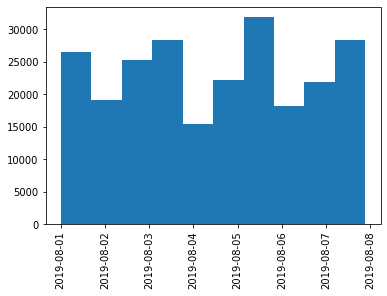

In [205]:
plt.hist(logs_updated_df1['event_datetime'])
plt.xticks(rotation=90)
plt.show()

***Based on the updated dataset logs_updated_df1 , start date is '2019-08-01' and end date is '2019-08-07'.  
We see some increased activity between 5th and 6th.***

In [206]:
#updated dataset details
logs_updated_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236975 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       236975 non-null  category      
 1   device_id_hash   236975 non-null  int64         
 2   event_timestamp  236975 non-null  int64         
 3   exp_id           236975 non-null  category      
 4   event_datetime   236975 non-null  datetime64[ns]
 5   event_date       236975 non-null  object        
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 9.5+ MB


In [207]:
#original datset
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  category      
 1   device_id_hash   244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   exp_id           244126 non-null  category      
 4   event_datetime   244126 non-null  datetime64[ns]
 5   event_date       244126 non-null  object        
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 7.9+ MB


In [208]:
#records in original dataset - records in updated one
records_lost=logs_df.shape[0] - logs_updated_df1.shape[0]
records_lost

7151

In [209]:
lost_percentage=records_lost/logs_df.shape[0]
lost_percentage

0.02929225072298731

In [210]:
#calculate number of users lost
users_in_original=logs_df['device_id_hash'].nunique()
users_in_updated=logs_updated_df1['device_id_hash'].nunique()
users_in_original


7551

In [211]:
users_in_updated

7452

In [212]:
lost_users=users_in_original-users_in_updated
lost_users_percentage=lost_users/users_in_original
lost_users

99

In [213]:
lost_users_percentage

0.013110846245530394

***We see a loss of around 1% of users from the original logs dataset which should not be a source of concern in our   
further analysis.***

***Data lost is very negligible around 2% of the dataset . So no major impact on the dataset is predicted.***

In [214]:
#getting the frequency of each event.  
events_frequency=pd.DataFrame(logs_updated_df1['event_name'].value_counts()).reset_index()
events_frequency=events_frequency.rename(columns={'index':'event_name','event_name':'count'})
events_frequency

,event_name,count
0,MainScreenAppear,116116
1,OffersScreenAppear,45679
2,CartScreenAppear,41183
3,PaymentScreenSuccessful,32997
4,Tutorial,1000


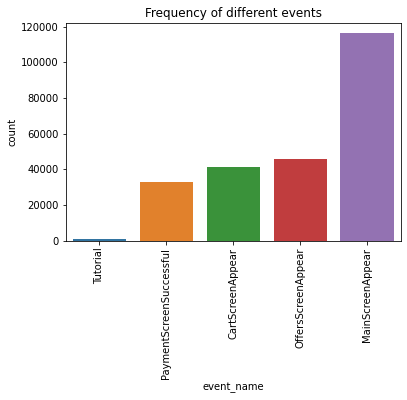

In [215]:
ax = sns.barplot(x='event_name', y='count', data=events_frequency,order=events_frequency.sort_values(by='count').event_name) 
ax.set_title('Frequency of different events')
plt.xticks(rotation=90)

plt.savefig('Frequency_of_events.png')

***From the above graph , we see that more visitors are there for MainSreen which also includes some repeated users.***

In [216]:
unique_user_in_event=logs_updated_df1.groupby('event_name').agg({'device_id_hash':['nunique','count']})
unique_user_in_event=unique_user_in_event.reset_index()
unique_user_in_event=unique_user_in_event.rename(columns={'nunique':'total_unique_user','count':'total_repeat_user'})
unique_user_in_event

event_name    device_id_hash                  
                           total_unique_user total_repeat_user
0         CartScreenAppear              3692             41183
1         MainScreenAppear              7338            116116
2       OffersScreenAppear              4540             45679
3  PaymentScreenSuccessful              3499             32997
4                 Tutorial               835              1000

***Based on the above table  we see that ,each user visits the 'Main screen'(7300) ,next they go to 'Offers page'(4550) and then adds to 'Carts Page '(3700) and finally 'payment successful ' page (3500)..Not much users  
are interested in 'Tutorial' page and it counts up to just 800..***

In [217]:
logs_updated_df1['device_id_hash'].nunique()

7452

In [218]:
unique_user_in_event

event_name    device_id_hash                  
                           total_unique_user total_repeat_user
0         CartScreenAppear              3692             41183
1         MainScreenAppear              7338            116116
2       OffersScreenAppear              4540             45679
3  PaymentScreenSuccessful              3499             32997
4                 Tutorial               835              1000

In [219]:
unique_user_in_event.columns = unique_user_in_event.columns.droplevel(0) 

In [220]:
unique_user_in_event

,,total_unique_user,total_repeat_user
0,CartScreenAppear,3692,41183
1,MainScreenAppear,7338,116116
2,OffersScreenAppear,4540,45679
3,PaymentScreenSuccessful,3499,32997
4,Tutorial,835,1000


In [221]:
unique_user_in_event['total_user']=7452

In [222]:
unique_user_in_event

,,total_unique_user,total_repeat_user,total_user
0,CartScreenAppear,3692,41183,7452
1,MainScreenAppear,7338,116116,7452
2,OffersScreenAppear,4540,45679,7452
3,PaymentScreenSuccessful,3499,32997,7452
4,Tutorial,835,1000,7452


In [223]:
unique_user_in_event.columns

Index(['', 'total_unique_user', 'total_repeat_user', 'total_user'], dtype='object')

In [224]:
#unique_user_in_event.columns.values[1] = "event_name"
unique_user_in_event=unique_user_in_event.rename(columns={unique_user_in_event.columns[0]:'event_name'})

In [225]:
unique_user_in_event

,event_name,total_unique_user,total_repeat_user,total_user
0,CartScreenAppear,3692,41183,7452
1,MainScreenAppear,7338,116116,7452
2,OffersScreenAppear,4540,45679,7452
3,PaymentScreenSuccessful,3499,32997,7452
4,Tutorial,835,1000,7452


In [226]:
unique_user_in_event['event_once']=unique_user_in_event['total_unique_user']/unique_user_in_event['total_repeat_user']

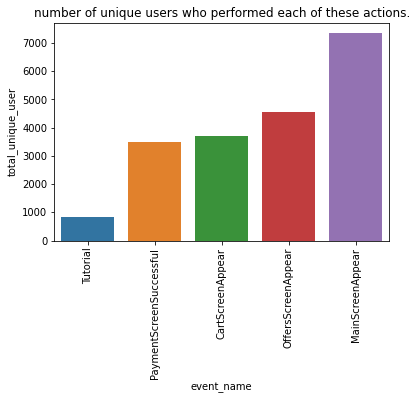

In [227]:
ax = sns.barplot(x='event_name', y='total_unique_user', data=unique_user_in_event,order=unique_user_in_event.sort_values(by='total_unique_user').event_name) 
ax.set_title('number of unique users who performed each of these actions.')
plt.xticks(rotation=90)

plt.savefig('users_actions..png')

***The above graph has a trend similar to the one we saw early..MainScreen being the most performed action  
followed by Offers ,then cart and finally payment . Since Tutorials is way few in numbers , we will analyse the other 4 actions.***

In [228]:
unique_user_in_event

,event_name,total_unique_user,total_repeat_user,total_user,event_once
0,CartScreenAppear,3692,41183,7452,0.089649
1,MainScreenAppear,7338,116116,7452,0.063195
2,OffersScreenAppear,4540,45679,7452,0.099389
3,PaymentScreenSuccessful,3499,32997,7452,0.106040
4,Tutorial,835,1000,7452,0.835000


In [229]:
unique_user_in_event['event_once_percent']=round(unique_user_in_event['event_once']*100)
unique_user_in_event

,event_name,total_unique_user,total_repeat_user,total_user,event_once,event_once_percent
0,CartScreenAppear,3692,41183,7452,0.089649,9.0
1,MainScreenAppear,7338,116116,7452,0.063195,6.0
2,OffersScreenAppear,4540,45679,7452,0.099389,10.0
3,PaymentScreenSuccessful,3499,32997,7452,0.106040,11.0
4,Tutorial,835,1000,7452,0.835000,84.0


In [230]:
logs_updated_df1.sort_values(by='event_date').head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
37062,PaymentScreenSuccessful,1051093549596532640,1564664765,247,2019-08-01 13:06:05,2019-08-01
37063,CartScreenAppear,1051093549596532640,1564664766,247,2019-08-01 13:06:06,2019-08-01
37064,CartScreenAppear,1051093549596532640,1564664780,247,2019-08-01 13:06:20,2019-08-01
37065,MainScreenAppear,1051093549596532640,1564665376,247,2019-08-01 13:16:16,2019-08-01
37066,MainScreenAppear,1051093549596532640,1564665452,247,2019-08-01 13:17:32,2019-08-01
37067,CartScreenAppear,1051093549596532640,1564665452,247,2019-08-01 13:17:32,2019-08-01
37068,CartScreenAppear,1051093549596532640,1564665459,247,2019-08-01 13:17:39,2019-08-01
37069,PaymentScreenSuccessful,1051093549596532640,1564665459,247,2019-08-01 13:17:39,2019-08-01
37070,OffersScreenAppear,1051093549596532640,1564665460,247,2019-08-01 13:17:40,2019-08-01


In [231]:
logs_updated_df1.isna().sum()

event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
event_datetime     0
event_date         0
dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'MainScreenAppear'),
  Text(1, 0, 'CartScreenAppear'),
  Text(2, 0, 'OffersScreenAppear'),
  Text(3, 0, 'PaymentScreenSuccessful'),
  Text(4, 0, 'Tutorial')])

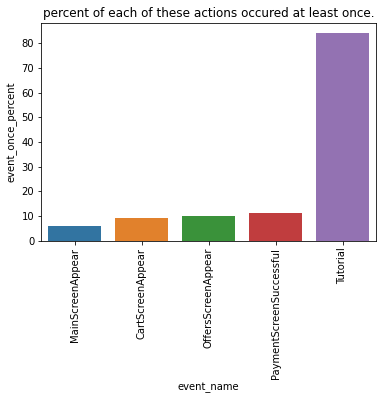

In [232]:
ax = sns.barplot(x='event_name', y='event_once_percent', data=unique_user_in_event,order=unique_user_in_event.sort_values(by='event_once_percent').event_name) 
ax.set_title('percent of each of these actions occured at least once.')
plt.xticks(rotation=90)


Since 'Tutorial ' is the least preferred action ,it has highest percent of single tiime as it has no repeated users.  
MAin page has more visitors which shows with slightly reduced bar compared to other events.  


##  Study the event funnel  


In [233]:
#get the first time user perform the event
users_first_access=logs_updated_df1.pivot_table(
    index='device_id_hash', 
    columns='event_name', 
    values='event_datetime',
    aggfunc='min')
users_first_access.head(10)

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
device_id_hash,,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT
6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,NaT
7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,NaT
8486814028069281,2019-08-05 04:49:18,2019-08-05 04:52:40,2019-08-05 04:49:13,NaT,NaT
8740973466195562,NaT,2019-08-02 09:16:48,2019-08-02 09:43:59,NaT,NaT
9841258664663090,2019-08-03 10:52:15,2019-08-03 10:47:59,2019-08-03 10:49:42,2019-08-03 17:57:27,2019-08-03 10:47:28
12692216027168046,NaT,2019-08-02 16:28:49,2019-08-05 04:06:02,NaT,NaT


In [234]:
#users who have viewed main screen
step_1 = ~users_first_access['MainScreenAppear'].isna()
#users who have viewed main screen and later views offers page
step_2 = step_1 & (users_first_access['OffersScreenAppear'] > users_first_access['MainScreenAppear'])
#users viewing cart page after main and offers page.
step_3 = step_2 & (users_first_access['CartScreenAppear'] > users_first_access['OffersScreenAppear'])
#users who completes he sequence with payment page at last.
step_4 = step_3 & (users_first_access['PaymentScreenSuccessful'] > users_first_access['CartScreenAppear'])

#count of valid users in each stage
n_pageview = users_first_access[step_1].shape[0]
n_offersview = users_first_access[step_2].shape[0]
n_cartview = users_first_access[step_3].shape[0]
n_paymentview = users_first_access[step_4].shape[0]

In [235]:
n_pageview


7338

In [236]:
n_offersview

4154

In [237]:
n_cartview 

1749

In [238]:
n_paymentview

450

In [239]:
data= {'event_name':['MainScreen','OffersScreen','CartScreen','PaymentScreen'],
        'n_users':[n_pageview,n_offersview,n_cartview,n_paymentview]}
sequence_views=pd.DataFrame(data)
sequence_views

,event_name,n_users
0,MainScreen,7338
1,OffersScreen,4154
2,CartScreen,1749
3,PaymentScreen,450


In [240]:
fig = go.Figure(go.Funnel(
    y = sequence_views['event_name'],
    x = sequence_views['n_users']
    ))
fig.show()

In [241]:
#ratio of users moving from 
#MainScreen to OffersScreen
main_offer= n_offersview/n_pageview

main_offer

0.5660943036249659

In [242]:
#OffersScreen to CartScreen
offer_cart=n_cartview/n_offersview
offer_cart

0.42103996148290807

In [243]:
#Cartcreen to PaymentScreen
cart_payment= n_paymentview/n_cartview
cart_payment

0.25728987993138935

In [244]:
#ratio of users that make from start (mainscreen) to end(payment)
main_payment=n_paymentview/n_pageview
main_payment


0.06132461161079313

### Intermediate Conclusion:

***Around 56%of users move from Main screen to Offers page. From there ,around 42% moves ahead to Cart page.  
And finally around 25% from the cart page ends up paying for the transaction .  
Overall only 6% of users in MainScreen completes the sequence by payment .***  

***We see that more users are stuck at Cart page and don't turn up to Payment ..Though not as small as Cart page ,  
Offers page also shows lesser turn out of around 42%.***

<div id='step2'/>

## Study the A/A/B test results.  


In [245]:
#create a dataset 'logs_a_df'  for exp_id=246
logs_a_df=logs_updated_df1[logs_updated_df1['exp_id']==246]
logs_a_df['device_id_hash'].nunique()

2484

In [246]:
#create a dataset 'logs_b_df'  for exp_id=247
logs_b_df=logs_updated_df1[logs_updated_df1['exp_id']==247]
logs_b_df.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
1,MainScreenAppear,1433840883824088890,1564619035,247,2019-08-01 00:23:55,2019-08-01
2,MainScreenAppear,1433840883824088890,1564619117,247,2019-08-01 00:25:17,2019-08-01
3,MainScreenAppear,1433840883824088890,1564619274,247,2019-08-01 00:27:54,2019-08-01
4,MainScreenAppear,1433840883824088890,1564619371,247,2019-08-01 00:29:31,2019-08-01
5,MainScreenAppear,1433840883824088890,1564619606,247,2019-08-01 00:33:26,2019-08-01
6,MainScreenAppear,1433840883824088890,1564619757,247,2019-08-01 00:35:57,2019-08-01
7,MainScreenAppear,1433840883824088890,1564619766,247,2019-08-01 00:36:06,2019-08-01
8,MainScreenAppear,1433840883824088890,1564810107,247,2019-08-03 05:28:27,2019-08-03
9,MainScreenAppear,1433840883824088890,1564810522,247,2019-08-03 05:35:22,2019-08-03


In [247]:
#create a dataset 'logs_c_df'  for exp_id=248
logs_c_df=logs_updated_df1[logs_updated_df1['exp_id']==248]
logs_c_df.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,4613461174774205834,1564618471,248,2019-08-01 00:14:31,2019-08-01
1,MainScreenAppear,4613461174774205834,1564618474,248,2019-08-01 00:14:34,2019-08-01
2,CartScreenAppear,4613461174774205834,1564618474,248,2019-08-01 00:14:34,2019-08-01
3,PaymentScreenSuccessful,4613461174774205834,1564618483,248,2019-08-01 00:14:43,2019-08-01
4,OffersScreenAppear,4613461174774205834,1564618491,248,2019-08-01 00:14:51,2019-08-01
5,MainScreenAppear,4613461174774205834,1564668928,248,2019-08-01 14:15:28,2019-08-01
6,OffersScreenAppear,4613461174774205834,1564668937,248,2019-08-01 14:15:37,2019-08-01
7,OffersScreenAppear,4613461174774205834,1564668959,248,2019-08-01 14:15:59,2019-08-01
8,MainScreenAppear,4613461174774205834,1564891382,248,2019-08-04 04:03:02,2019-08-04
9,OffersScreenAppear,4613461174774205834,1564891391,248,2019-08-04 04:03:11,2019-08-04


***Based on the 'events_frequency' dataset we created earlier ,we see that 'MainScreenAppear' is the most popular event compared to  
all other events.***

In [248]:
#group 'logs_a_df' dataset of the groups based on event_name
temp_a_df=logs_a_df.groupby('event_name')['device_id_hash'].nunique().reset_index()
temp_a_df=temp_a_df.rename(columns={'device_id_hash':'n_users'})
temp_a_df['n_total']=logs_a_df['device_id_hash'].nunique()
temp_a_df['n_share']=temp_a_df['n_users']/temp_a_df['n_total']
temp_a_df

,event_name,n_users,n_total,n_share
0,CartScreenAppear,1266,2484,0.509662
1,MainScreenAppear,2450,2484,0.986312
2,OffersScreenAppear,1542,2484,0.620773
3,PaymentScreenSuccessful,1200,2484,0.483092
4,Tutorial,278,2484,0.111916


***There is no visible oulier/anamoly condition ..***

In [249]:
#group 'logs_b_df' dataset of the groups based on event_name
temp_b_df=logs_b_df.groupby('event_name')['device_id_hash'].nunique().reset_index()
temp_b_df=temp_b_df.rename(columns={'device_id_hash':'n_users'})
temp_b_df['n_total']=logs_b_df['device_id_hash'].nunique()
temp_b_df['n_share']=temp_b_df['n_users']/temp_b_df['n_total']
temp_b_df

,event_name,n_users,n_total,n_share
0,CartScreenAppear,1221,2484,0.491546
1,MainScreenAppear,2448,2484,0.985507
2,OffersScreenAppear,1498,2484,0.603060
3,PaymentScreenSuccessful,1142,2484,0.459742
4,Tutorial,279,2484,0.112319


***There is no visible oulier/anamoly condition ..***

In [250]:
#group 'logs_c_df' dataset of the groups based on event_name
temp_c_df=logs_c_df.groupby('event_name')['device_id_hash'].nunique().reset_index()
temp_c_df=temp_c_df.rename(columns={'device_id_hash':'n_users'})
temp_c_df['n_total']=logs_c_df['device_id_hash'].nunique()
temp_c_df['n_share']=temp_c_df['n_users']/temp_c_df['n_total']
temp_c_df

,event_name,n_users,n_total,n_share
0,CartScreenAppear,1205,2484,0.485105
1,MainScreenAppear,2440,2484,0.982287
2,OffersScreenAppear,1500,2484,0.603865
3,PaymentScreenSuccessful,1157,2484,0.465781
4,Tutorial,278,2484,0.111916


***There is no visible oulier/anamoly condition ..All the 3 groups shows similar trends with very less difference ..***

In [251]:
#test the datasets proportion determine their proportions, and confirm that the groups see absolutely identical
#versions of the product and share the same key metrics.
alpha=0.05
def test_proportions(success1,trial1,success2,trial2):
    successes = np.array([success1,success2])
    trials = np.array([trial1,trial2])

# success proportion in the first group:
    p1 = successes[0]/trials[0]

# success proportion in the second group:
    p2 = successes[1]/trials[1]

# success proportion in the combined dataset:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# the difference between the datasets' proportions
    difference = p1 - p2 
    
#calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions")
    else:
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 

In [252]:
# test 2 control groups -temp_a_df and temp_b_df
for i in range(0,5):
    test_proportions(temp_a_df['n_users'][i],temp_a_df['n_total'][i],temp_b_df['n_users'][i],temp_b_df['n_total'][i])
    

p-value:  0.20164259374014426
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.8097505670540195
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.20018948701138894
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.09925864906067261
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.9641335503925432
Failed to reject the null hypothesis: there is no reason to consider the proportions different


In [253]:
# test 2 groups -temp_a_df and temp_c_df
for i in range(0,5):
    test_proportions(temp_a_df['n_users'][i],temp_a_df['n_total'][i],temp_c_df['n_users'][i],temp_c_df['n_total'][i])
    

p-value:  0.08346746391846582
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.25375685931232717
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.22132344146071903
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.22180891346964282
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  1.0
Failed to reject the null hypothesis: there is no reason to consider the proportions different


In [254]:
# test 2 groups -temp_b_df and temp_c_df
for i in range(0,5):
    test_proportions(temp_b_df['n_users'][i],temp_b_df['n_total'][i],temp_c_df['n_users'][i],temp_c_df['n_total'][i])
    

p-value:  0.6497372092715701
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.3672072961616979
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.9537439616507863
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.6695150779166885
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.9641335503925432
Failed to reject the null hypothesis: there is no reason to consider the proportions different


In [255]:
#test control groups combined  246+247 and test group 248
# test 2 groups -(temp_a_df+temp_b_df) and temp_c_df

#getting a sample of 1242 rows from each control group and making a dataset with the sampled records(temp_a_df+temp_b_df)
temp_a_df1=logs_a_df
#take a sample of 2484 users with exp_id=246
temp_a_df2=logs_a_df.groupby('device_id_hash').nunique().reset_index()
temp_a_df2=temp_a_df2['device_id_hash'].sample(1242)
temp_df=pd.DataFrame(temp_a_df2)
temp_df.head(10)


,device_id_hash
222,873803562299540764
729,2775946490473556864
2443,9110608674894233944
1279,4839247845026807081
2161,8096388234683905724
274,1064069332576331836
171,676216329641097226
804,3006587517466358850
497,1889828697752518631
422,1618772384609580447


In [256]:
temp_a_df1=temp_a_df1.merge(temp_df,on='device_id_hash')
temp_a_df1.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,OffersScreenAppear,6633275515297644052,1564619494,246,2019-08-01 00:31:34,2019-08-01
1,OffersScreenAppear,6633275515297644052,1564626671,246,2019-08-01 02:31:11,2019-08-01
2,OffersScreenAppear,6633275515297644052,1564627247,246,2019-08-01 02:40:47,2019-08-01
3,OffersScreenAppear,6633275515297644052,1564651741,246,2019-08-01 09:29:01,2019-08-01
4,OffersScreenAppear,6633275515297644052,1564662191,246,2019-08-01 12:23:11,2019-08-01
5,OffersScreenAppear,6633275515297644052,1564662268,246,2019-08-01 12:24:28,2019-08-01
6,OffersScreenAppear,6633275515297644052,1564667662,246,2019-08-01 13:54:22,2019-08-01
7,PaymentScreenSuccessful,6633275515297644052,1564667672,246,2019-08-01 13:54:32,2019-08-01
8,CartScreenAppear,6633275515297644052,1564667672,246,2019-08-01 13:54:32,2019-08-01
9,OffersScreenAppear,6633275515297644052,1564746830,246,2019-08-02 11:53:50,2019-08-02


In [257]:
temp_a_df1['device_id_hash'].nunique()

1242

In [258]:
temp_b_df1=logs_b_df
#take a sample of 2484 users with exp_id=247
temp_b_df2=logs_b_df.groupby('device_id_hash').nunique().reset_index()
temp_b_df2=temp_b_df2['device_id_hash'].sample(1242)
temp_df1=pd.DataFrame(temp_b_df2)
temp_df1
temp_b_df1=temp_b_df1.merge(temp_df1,on='device_id_hash')
temp_b_df1.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,2712290788139738557,1564618961,247,2019-08-01 00:22:41,2019-08-01
1,PaymentScreenSuccessful,2712290788139738557,1564618964,247,2019-08-01 00:22:44,2019-08-01
2,CartScreenAppear,2712290788139738557,1564618965,247,2019-08-01 00:22:45,2019-08-01
3,MainScreenAppear,2712290788139738557,1564618965,247,2019-08-01 00:22:45,2019-08-01
4,OffersScreenAppear,2712290788139738557,1564618973,247,2019-08-01 00:22:53,2019-08-01
5,PaymentScreenSuccessful,2712290788139738557,1564618988,247,2019-08-01 00:23:08,2019-08-01
6,CartScreenAppear,2712290788139738557,1564618989,247,2019-08-01 00:23:09,2019-08-01
7,CartScreenAppear,2712290788139738557,1564619000,247,2019-08-01 00:23:20,2019-08-01
8,PaymentScreenSuccessful,2712290788139738557,1564619000,247,2019-08-01 00:23:20,2019-08-01
9,PaymentScreenSuccessful,2712290788139738557,1564619014,247,2019-08-01 00:23:34,2019-08-01


In [259]:
temp_b_df1['device_id_hash'].nunique()

1242

In [260]:
#appending the records from control group b to group a and get combined group(temp_ab_combined_df)
temp_ab_combined_df=temp_a_df1.append(temp_b_df1)
temp_ab_combined_df.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,OffersScreenAppear,6633275515297644052,1564619494,246,2019-08-01 00:31:34,2019-08-01
1,OffersScreenAppear,6633275515297644052,1564626671,246,2019-08-01 02:31:11,2019-08-01
2,OffersScreenAppear,6633275515297644052,1564627247,246,2019-08-01 02:40:47,2019-08-01
3,OffersScreenAppear,6633275515297644052,1564651741,246,2019-08-01 09:29:01,2019-08-01
4,OffersScreenAppear,6633275515297644052,1564662191,246,2019-08-01 12:23:11,2019-08-01
5,OffersScreenAppear,6633275515297644052,1564662268,246,2019-08-01 12:24:28,2019-08-01
6,OffersScreenAppear,6633275515297644052,1564667662,246,2019-08-01 13:54:22,2019-08-01
7,PaymentScreenSuccessful,6633275515297644052,1564667672,246,2019-08-01 13:54:32,2019-08-01
8,CartScreenAppear,6633275515297644052,1564667672,246,2019-08-01 13:54:32,2019-08-01
9,OffersScreenAppear,6633275515297644052,1564746830,246,2019-08-02 11:53:50,2019-08-02


In [261]:
temp_ab_combined_df1=temp_ab_combined_df.groupby('event_name')['device_id_hash'].nunique().reset_index()
temp_ab_combined_df1=temp_ab_combined_df1.rename(columns={'device_id_hash':'n_users'})


In [262]:
#gettingn total users and share of users performing each event
total_users=temp_ab_combined_df['device_id_hash'].nunique()
temp_ab_combined_df1['n_total']=total_users
temp_ab_combined_df1['n_share']=temp_ab_combined_df1['n_users']/temp_ab_combined_df1['n_total']
temp_ab_combined_df1


,event_name,n_users,n_total,n_share
0,CartScreenAppear,1229,2484,0.494767
1,MainScreenAppear,2455,2484,0.988325
2,OffersScreenAppear,1498,2484,0.603060
3,PaymentScreenSuccessful,1161,2484,0.467391
4,Tutorial,262,2484,0.105475


In [263]:
#test control groups combined  246+247 and test group 248
# test 2 groups -(temp_a_df+temp_b_df) and temp_c_df

for i in range(0,5):
     test_proportions(temp_ab_combined_df1['n_users'][i],temp_ab_combined_df1['n_total'][i],temp_c_df['n_users'][i],temp_c_df['n_total'][i])


p-value:  0.4957808667064203
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.07695068533807903
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.9537439616507863
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.9094318794084559
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p-value:  0.46581419098244403
Failed to reject the null hypothesis: there is no reason to consider the proportions different


***We therefore conclude that group c and group formed by combining a and b also split correctly based on the above test  
of proportion.***

***Based on the test of proportions, we conclude that the groups were split properly.***

In [264]:
#function to Test if the 2 samples are staistically different
def test_stat_difference(sample1,sample2):
    results = st.ttest_ind(sample1,sample2)
    print('p-value: ', results.pvalue)
    if results.pvalue < alpha:
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")

In [265]:
#testing the 2 control groups and the test groups for any difference
test_stat_difference(temp_a_df['n_share'],temp_b_df['n_share'])
test_stat_difference(temp_a_df['n_share'],temp_c_df['n_share'])
test_stat_difference(temp_b_df['n_share'],temp_a_df['n_share'])

p-value:  0.9535664759168734
We can't reject the null hypothesis
p-value:  0.9509748157273485
We can't reject the null hypothesis
p-value:  0.9535664759168734
We can't reject the null hypothesis


***Based on the 'test_stat_difference' results , we see that all 3 samples doesn't have much difference .***

***Lets compare if any change in trend with respect to each event per day in all the 3 groups..  
Will go with cumulative user count here.***

In [266]:
#working with group a 'exp_id=246'
cum_a_df= logs_a_df.groupby(['event_date','event_name']).agg({'device_id_hash':'nunique'}).reset_index()
cum_a_df.head(5)


,event_date,event_name,device_id_hash
0,2019-08-01,CartScreenAppear,497
1,2019-08-01,MainScreenAppear,1140
2,2019-08-01,OffersScreenAppear,656
3,2019-08-01,PaymentScreenSuccessful,452
4,2019-08-01,Tutorial,50


In [267]:
#getting cumulative number of users viewing main page 
cum_a_main_df=cum_a_df[cum_a_df['event_name']=='MainScreenAppear']
cum_a_main_df['user_cum']=cum_a_main_df['device_id_hash'].cumsum()

In [268]:
cum_a_main_df

,event_date,event_name,device_id_hash,user_cum
1,2019-08-01,MainScreenAppear,1140,1140
6,2019-08-02,MainScreenAppear,1144,2284
11,2019-08-03,MainScreenAppear,1079,3363
16,2019-08-04,MainScreenAppear,1113,4476
21,2019-08-05,MainScreenAppear,1209,5685
26,2019-08-06,MainScreenAppear,1215,6900
31,2019-08-07,MainScreenAppear,1143,8043


In [269]:
#getting cumulative number of users viewing Offers page 
cum_a_offers_df=cum_a_df[cum_a_df['event_name']=='OffersScreenAppear']
cum_a_offers_df['user_cum']=cum_a_offers_df['device_id_hash'].cumsum()
cum_a_offers_df

,event_date,event_name,device_id_hash,user_cum
2,2019-08-01,OffersScreenAppear,656,656
7,2019-08-02,OffersScreenAppear,687,1343
12,2019-08-03,OffersScreenAppear,698,2041
17,2019-08-04,OffersScreenAppear,697,2738
22,2019-08-05,OffersScreenAppear,734,3472
27,2019-08-06,OffersScreenAppear,717,4189
32,2019-08-07,OffersScreenAppear,702,4891


In [270]:
#getting cumulative number of users viewing cart page 
cum_a_cart_df=cum_a_df[cum_a_df['event_name']=='CartScreenAppear']
cum_a_cart_df['user_cum']=cum_a_cart_df['device_id_hash'].cumsum()
cum_a_cart_df

,event_date,event_name,device_id_hash,user_cum
0,2019-08-01,CartScreenAppear,497,497
5,2019-08-02,CartScreenAppear,513,1010
10,2019-08-03,CartScreenAppear,504,1514
15,2019-08-04,CartScreenAppear,497,2011
20,2019-08-05,CartScreenAppear,525,2536
25,2019-08-06,CartScreenAppear,512,3048
30,2019-08-07,CartScreenAppear,490,3538


In [271]:
#getting cumulative number of users viewing payment page 
cum_a_payment_df=cum_a_df[cum_a_df['event_name']=='PaymentScreenSuccessful']
cum_a_payment_df['user_cum']=cum_a_payment_df['device_id_hash'].cumsum()
cum_a_payment_df

,event_date,event_name,device_id_hash,user_cum
3,2019-08-01,PaymentScreenSuccessful,452,452
8,2019-08-02,PaymentScreenSuccessful,469,921
13,2019-08-03,PaymentScreenSuccessful,484,1405
18,2019-08-04,PaymentScreenSuccessful,465,1870
23,2019-08-05,PaymentScreenSuccessful,491,2361
28,2019-08-06,PaymentScreenSuccessful,486,2847
33,2019-08-07,PaymentScreenSuccessful,464,3311


In [272]:
#getting cumulative number of users viewing each  page for group b -'exp_id=247'
cum_b_df= logs_b_df.groupby(['event_date','event_name']).agg({'device_id_hash':'nunique'}).reset_index()
cum_b_main_df=cum_b_df[cum_b_df['event_name']=='MainScreenAppear']
cum_b_main_df['user_cum']=cum_b_main_df['device_id_hash'].cumsum()
cum_b_offers_df=cum_b_df[cum_b_df['event_name']=='OffersScreenAppear']
cum_b_offers_df['user_cum']=cum_b_offers_df['device_id_hash'].cumsum()
cum_b_cart_df=cum_b_df[cum_b_df['event_name']=='CartScreenAppear']
cum_b_cart_df['user_cum']=cum_b_cart_df['device_id_hash'].cumsum()
cum_b_payment_df=cum_b_df[cum_b_df['event_name']=='PaymentScreenSuccessful']
cum_b_payment_df['user_cum']=cum_b_payment_df['device_id_hash'].cumsum()


In [273]:
#getting cumulative number of users viewing each  page for group c-'exp_id=248'
cum_c_df= logs_c_df.groupby(['event_date','event_name']).agg({'device_id_hash':'nunique'}).reset_index()
cum_c_main_df=cum_c_df[cum_c_df['event_name']=='MainScreenAppear']
cum_c_main_df['user_cum']=cum_c_main_df['device_id_hash'].cumsum()
cum_c_offers_df=cum_c_df[cum_c_df['event_name']=='OffersScreenAppear']
cum_c_offers_df['user_cum']=cum_c_offers_df['device_id_hash'].cumsum()
cum_c_cart_df=cum_c_df[cum_c_df['event_name']=='CartScreenAppear']
cum_c_cart_df['user_cum']=cum_c_cart_df['device_id_hash'].cumsum()
cum_c_payment_df=cum_c_df[cum_c_df['event_name']=='PaymentScreenSuccessful']
cum_c_payment_df['user_cum']=cum_c_payment_df['device_id_hash'].cumsum()

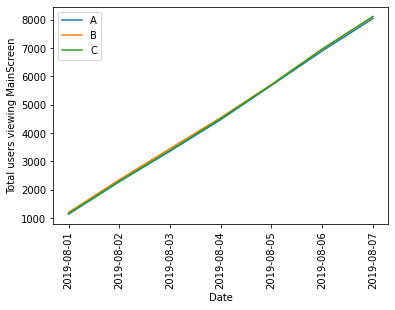

In [274]:
# Plotting the group A main screen viewers
plt.plot(cum_a_main_df['event_date'], cum_a_main_df['user_cum'], label='A')
# Plotting the group B main screen viewers
plt.plot(cum_b_main_df['event_date'], cum_b_main_df['user_cum'], label='B')
# Plotting the group C main screen viewers
plt.plot(cum_c_main_df['event_date'], cum_c_main_df['user_cum'], label='C')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Total users viewing MainScreen')
plt.show()

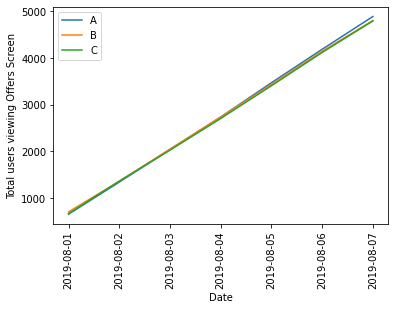

In [275]:
# Plotting the group A offers screen viewers
plt.plot(cum_a_offers_df['event_date'], cum_a_offers_df['user_cum'], label='A')
# Plotting the group B offers screen viewers
plt.plot(cum_b_offers_df['event_date'], cum_b_offers_df['user_cum'], label='B')
# Plotting the group C offers screen viewers
plt.plot(cum_c_offers_df['event_date'], cum_c_offers_df['user_cum'], label='C')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Total users viewing Offers Screen')
plt.show()

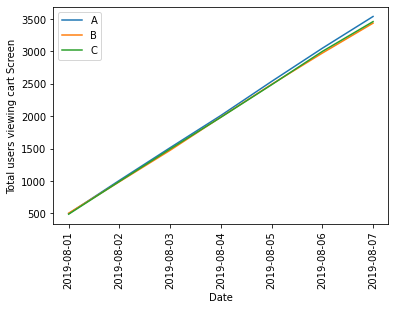

In [276]:
# Plotting the group A cart screen viewers
plt.plot(cum_a_cart_df['event_date'], cum_a_cart_df['user_cum'], label='A')
# Plotting the group B cart screen viewers
plt.plot(cum_b_cart_df['event_date'], cum_b_cart_df['user_cum'], label='B')
# Plotting the group C cart screen viewers
plt.plot(cum_c_cart_df['event_date'], cum_c_cart_df['user_cum'], label='C')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Total users viewing cart Screen')
plt.show()

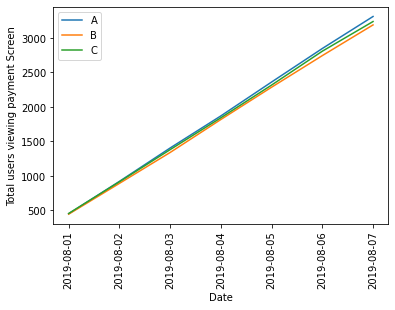

In [277]:
# Plotting the group A payment screen viewers
plt.plot(cum_a_payment_df['event_date'], cum_a_payment_df['user_cum'], label='A')
# Plotting the group B payment  screen viewers
plt.plot(cum_b_payment_df['event_date'], cum_b_payment_df['user_cum'], label='B')
# Plotting the group C payment  screen viewers
plt.plot(cum_c_payment_df['event_date'], cum_c_payment_df['user_cum'], label='C')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Total users viewing payment Screen')
plt.show()

***We don't see much difference in the groups based on the events.***

<div id='end'/>

## Final Conclusion

***Based oon the given data we see that  
1.Only 6% of the users viewing the Mainscreen finishes the sequence by doing payment.  
2.'Tutorial' is the least performed action .So we continued analysis with the rest 4 events.  
3.The number of user getting to next stage of the sequence gets reduced gradually from Main page  
but gets down to 25% when going to payment page.
4.Comparing eah group , we see that all 3 shows similar trend in tems of different events .  
Since we have just a week data ,it's better to wait for few more days before concluding if the   
change of fonts impacts the performance of the app.***